# IEFI Lautaro Santos Da Silveira

### Librerias

In [326]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk import regexp_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
!python -m spacy download es_core_news_sm
import spacy
nlp= spacy.load('es_core_news_sm')
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from  wordcloud import WordCloud
import  matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


^C


### Set de datos

In [ ]:
#df= pd.read_excel(r'D:\Escritorio\IES21\4to cuatrimestre\PLN\Noticias Verdaderas y Falsas.xlsx')
df= pd.read_excel(r'C:\Users\Usuario\Desktop\lautaro\ies 21\IES21\4to cuatrimestre\PLN\Noticias Verdaderas y Falsas.xlsx')
# Se mezclan de forma aleatoria los datos por si estos fueron cargados de alguna forma en particular
df=shuffle(df, random_state=123)
df.head()

,class,Text
1342,True,Los mejores momentos del desfile de Victoria's...
1338,True,Los jóvenes de entre 19 y 24 años dedican meno...
189,True,Los españoles que aguardaron horas delante de...
1332,False,Los eurodiputados de la comisión de Sanidad de...
1816,False,En busca y captura el joven que lanzó pirotecn...


Divido mi Set de Datos en dos, generando uno que serán los casos que tengo conocimiento historico, perteneciente a df_conocido, y otro que no tendrán la clasificacion, los cuales se utilizarán en un futuro para la predicción.

In [ ]:
df_conocido, df_desconocido= train_test_split(df,test_size=0.2,random_state=123)
# Set de datos para entrenamiento y elección de modelo
df_conocido=df_conocido.reset_index()
df_conocido.drop(['index'],axis=1,inplace=True)
# Set de datos a predecir 
df_Testeo = df_desconocido['Text']
print('Set de Datos conocidos')
display(df_conocido.head())
print('Set de Datos desconocidos')
df_Testeo.head()

Set de Datos conocidos


,class,Text
0,False,"Matan a la madre, la descuartizan y aún con la..."
1,True,Tras cerrar con varios hilos abiertos JuegodeT...
2,True,La candidata socialista a la presidencia de La...
3,False,"Pese a ser el animal doméstico por excelencia,..."
4,True,"Aramco, la empresa más rentable del planeta, ..."


Set de Datos desconocidos


1732    Un sacerdote español fue expulsado de su parro...
370     BBVA ha reconocido a la Comisión Nacional del ...
656     El Govern de la Generalitat responsabilizó aye...
349     Arrestado un hombre de 24 años sospechoso de s...
1920     España registró el mayor descenso interanual ...
Name: Text, dtype: object

#### Gráfico de proporcion en mi Set de Datos conocidos

Se desea analizar si tengo variacion en mi set de datos luego de hacer una separacion aleatoria.

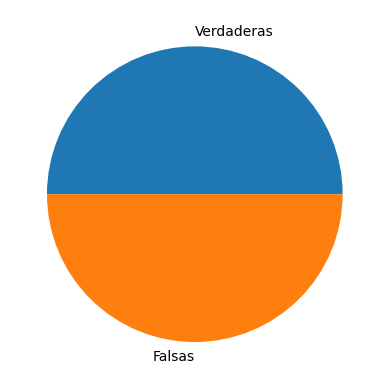

In [ ]:
y = np.array([(df_conocido['class']==True).sum(), (df_conocido['class']==False).sum()])
mylabels = ["Verdaderas", "Falsas"]

plt.pie(y, labels = mylabels)
plt.show()

### Funcion de preprocesamiento

In [ ]:
stops= set(stopwords.words('spanish'))
def preprocesamiento(documento):
# Eliminación de valores numéricos
  documento = re.sub('\d', ' ', documento)
  # Minusculizacion del documento
  documento = documento.lower()
############################## TOKENIZAR ##############################
# Tokenizo con una List Comprehension, y luego a esta le filtro las stopwords
  tokenizado = [token for token in regexp_tokenize(documento, pattern='\w+')]
  filtro = [filtro for filtro in tokenizado if filtro not in stops]
############################## LEMATIZAR ##############################
# Spacy tiene su propio tokenizador 
  doc= nlp(documento)
# Lematizo al texto, para eliminár los signos de puntuación o demas signos que no me aportarán al análisis, se filtrarán los tokens
# que están en la anterior List Comprehension llamada filtro
  lemma = [lema.lemma_ for lema in doc if str(lema) in filtro]
  # transformo mi lista de tokens a una cadena de texto
  Procesada=" ".join(map(str, lemma))
  return Procesada

In [ ]:
# Divido mi x e y
x= df_conocido['Text']
y=df_conocido['class']

In [ ]:
# Aplico mi funcion de preprocesamiento a mis variables 
pre_procesamiento=x.apply(preprocesamiento)
pre_procesamiento

0       matar madre descuartizar aún carne caliente co...
1       tras cerrar varios hilo abierto juegodetrono h...
2       candidata socialista presidencia rioja conchab...
3       pese ser animal doméstico excelencia españa ge...
4       aramco empresa rentable planeta lanzar domingo...
                              ...                        
1595    arabio saudito acabar cortar él cabeza esra ll...
1596    maternidad frustrado españolasparda montar dec...
1597    agente policía guardia civil trabajar programa...
1598    acción buen buen forzar reacción violento inde...
1599    ex cuñada josé enrique abuín gey alias chicle ...
Name: Text, Length: 1600, dtype: object

In [ ]:
# Genero un vector TF-IDF con la frecuencia de cada token en todos los documentos
vectorizer = TfidfVectorizer()
vectores = vectorizer.fit_transform(pre_procesamiento).toarray()
nombres= vectorizer.get_feature_names_out()
df_vector= pd.DataFrame(vectores,columns=nombres )
df_vector

,abalanzar,abandonado,abandonar,abandono,abascal,abasccal,abateír,abatir,abc,abcel,...,órbita,órgano,óscar,últimamente,último,único,útil,сото,тара,те
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.216389,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Graficos

#### Palabras mas usadas en todo el set de datos

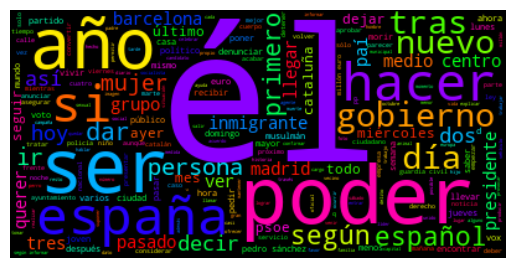

In [ ]:
todas_palabras = " ".join([palabra for palabra in pre_procesamiento])
wc = WordCloud(background_color = "black",colormap = "hsv", max_font_size = 150, random_state = 123).generate(todas_palabras)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Palabras mas usadas en noticias verdaderas

In [ ]:
df_Grafico= pd.DataFrame()
df_Grafico['Token']= pre_procesamiento
df_Grafico['clase']=y

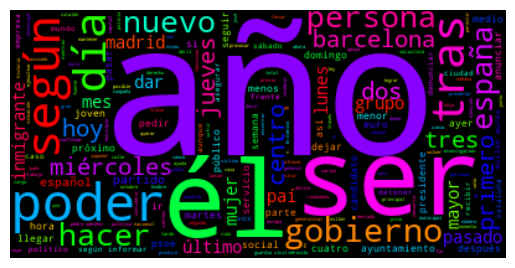

In [ ]:
Palabras_Verdaderas = " ".join([palabra for palabra in df_Grafico['Token'][df_Grafico['clase']==True]])
wc = WordCloud(background_color = "black",colormap = "hsv", max_font_size = 150, random_state = 123).generate(Palabras_Verdaderas)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

#### Palabras mas usadas en noticias falsas

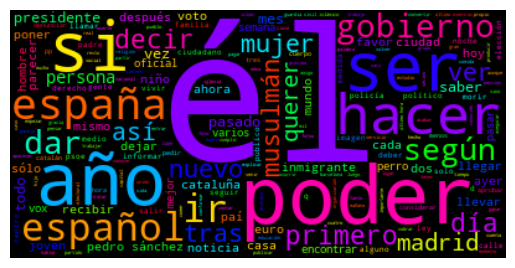

In [ ]:
Palabras_Falsas = " ".join([palabra for palabra in df_Grafico['Token'][df_Grafico['clase']==False]])
wc = WordCloud(background_color = "black",colormap = "hsv", max_font_size = 150, random_state = 123).generate(Palabras_Falsas)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Modelos de ML

In [ ]:
# Genero mi set de datos para entrenamiento y testeo 
x_train,x_test,y_train,y_test= train_test_split(df_vector,y,test_size=0.2,random_state=123)

In [ ]:
len(x_train), len(x_test)

(1280, 320)

### Modelo de Clasificacion SVM

In [ ]:
svc= SVC(random_state=123)

# Creamos la grilla de hiperparametros a probar
param_grid_svc = [{'C':[1.32,1.33,1.34], 'gamma':['scale']}]

# Creamos el GSCV para buscar los mejores hiperparámetros 
gscv_svc = GridSearchCV(estimator=svc,
                    param_grid=param_grid_svc, 
                    scoring='accuracy',
                    n_jobs=-1,
                    cv=5,
                    verbose=0,
                    refit=True)

gscv_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=-1,
             param_grid=[{'C': [1.32, 1.33, 1.34], 'gamma': ['scale']}],
             scoring='accuracy')

In [304]:
gscv_svc.best_params_

{'C': 1.32, 'gamma': 'scale'}

In [330]:
desvios_svc = gscv_svc.cv_results_['std_test_score'] 
desvio_mejor_svc=desvios_svc[gscv_svc.best_index_]
print("Accuracy: ",gscv_svc.best_score_,' +/- ', 2*desvio_mejor_svc, '( 95% )')

Accuracy:  0.771875  +/-  0.06434768838116875 ( 95% )


Una vez encontrado los mejores hiperparametros se procede a entrenar el modelo con los mismos

El valor del Accuracy del modelo es igual a 0.76875


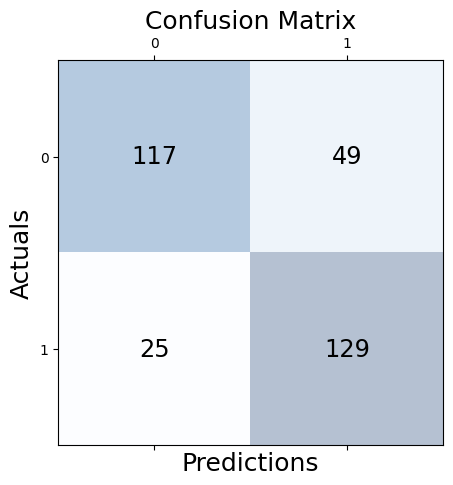

In [313]:
from sklearn.metrics import confusion_matrix, accuracy_score
svc_final= SVC(random_state=123, C=1.33, gamma='scale')
svc_final.fit(x_train, y_train)
y_pred = svc_final.predict(x_test)
AC = accuracy_score(y_test, y_pred)
# Matriz de confusión
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
print(f'El valor del Accuracy del modelo es igual a {AC}')
plt.show()

Mi set de testeo cuenta con 320 observaciones, y mi modelo predice correctamente 246 observaciones. 

### Prediccion para datos no conocidos

In [320]:
nuevos= df_Testeo.apply(preprocesamiento)
nuevos_transf= vectorizer.transform(nuevos).toarray()

In [321]:
# Entreno al modelo con todos los valores 
svc_final.fit(df_vector,y)
# Obtengo las predicciones de los datos nuevos
predicciones=svc_final.predict(nuevos_transf)

c:\Users\Usuario\Desktop\lautaro\ies 21\entorno\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
